# Libraries, directory and data

In [1]:
#libraries 
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns

In [3]:
#load the data
df = pd.read_csv("Clothing.csv")
df.head()

,tsales,sales,margin,nown,nfull,npart,naux,hoursw,hourspw,inv1,inv2,ssize,start
0,750000,4411.765,41.0,1.0,1.0000,1.0000,1.5357,76,16.75596,17166.67,27177.04,170,41.0
1,1926395,4280.878,39.0,2.0,2.0000,3.0000,1.5357,192,22.49376,17166.67,27177.04,450,39.0
2,1250000,4166.667,40.0,1.0,2.0000,2.2222,1.4091,114,17.19120,292857.20,71570.55,300,40.0
3,694227,2670.104,40.0,1.0,1.0000,1.2833,1.3673,100,21.50260,22207.04,15000.00,260,40.0
4,750000,15000.000,44.0,2.0,1.9556,1.2833,1.3673,104,15.74279,22207.04,10000.00,50,44.0


In [7]:
#picking variables
df = df[["tsales","margin","nown","inv1","inv2","ssize","start"]]
df.head()

,tsales,margin,nown,inv1,inv2,ssize,start
0,750000,41.0,1.0,17166.67,27177.04,170,41.0
1,1926395,39.0,2.0,17166.67,27177.04,450,39.0
2,1250000,40.0,1.0,292857.20,71570.55,300,40.0
3,694227,40.0,1.0,22207.04,15000.00,260,40.0
4,750000,44.0,2.0,22207.04,10000.00,50,44.0


# Analysing the data

In [8]:
#Summary statistics
df.describe()

,tsales,margin,nown,inv1,inv2,ssize,start
count,4.000000e+02,400.000000,400.000000,4.000000e+02,400.000000,400.000000,400.000000
mean,8.335842e+05,38.774230,1.283796,5.825726e+04,27829.217000,151.050000,42.808462
std,5.834638e+05,5.218184,0.639773,1.075588e+05,41501.943418,112.498254,13.296070
min,5.000000e+04,16.000000,1.000000,1.000000e+03,350.000000,16.000000,16.000000
25%,4.953400e+05,37.000000,1.000000,2.000000e+04,10000.000000,80.000000,37.000000
50%,6.942270e+05,39.000000,1.000000,2.220704e+04,22859.850000,120.000000,40.000000
75%,9.768170e+05,41.000000,1.295225,6.226923e+04,22859.850000,190.000000,42.000000
max,5.000000e+06,66.000000,10.000000,1.500000e+06,400000.000000,1214.000000,90.000000


<Axes: >

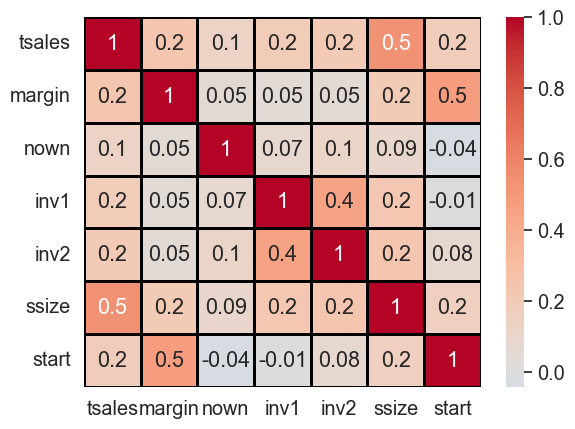

In [16]:
#Correlation matrix
sns.heatmap(df.corr(),
            annot = True,
            fmt = '.1g',
            center = 0,
            cmap = 'coolwarm',
            linewidths = 1,
            linecolor = 'black')

# Multilinear regression preparation

In [18]:
#isolate X and Y
y = df.tsales
X = df.drop(columns = ["tsales"])
X = sm.add_constant(X)
X.head(3)

,const,margin,nown,inv1,inv2,ssize,start
0,1.0,41.0,1.0,17166.67,27177.04,170,41.0
1,1.0,39.0,2.0,17166.67,27177.04,450,39.0
2,1.0,40.0,1.0,292857.20,71570.55,300,40.0


In [20]:
#Training and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 1502)
X_train.head(3)

,const,margin,nown,inv1,inv2,ssize,start
201,1.0,42.0,3.0,22207.04,400000.00,400,42.0
25,1.0,35.0,1.0,62269.23,20000.00,160,35.0
94,1.0,39.0,1.0,22207.04,22859.85,200,39.0


# Multilinear Regression

In [33]:
#Multilinear regression
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 tsales   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     30.43
Date:                Fri, 23 May 2025   Prob (F-statistic):           5.49e-30
Time:                        19:34:41   Log-Likelihood:                -5801.5
No. Observations:                 400   AIC:                         1.162e+04
Df Residuals:                     393   BIC:                         1.164e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.408e+05   1.87e+05     -1.289      0.1

# Accuracy Assessment

In [34]:
#Predict
predictions = model.predict(X_test)
predictions[:5]

270    1.510409e+06
380    7.399356e+05
326    7.014098e+05
60     6.571180e+05
316    3.321499e+05
dtype: float64

In [36]:
#Accuracy assessment
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("MAE :",round(mean_absolute_error(y_test,predictions),1))
print("RMSE :",round(np.sqrt(mean_squared_error(y_test,predictions)),1))

MAE : 339106.5
RMSE : 508710.1
